# 11. Region properties exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.morphology
import skimage.io

1.Import the image in '../Data/3color_cells.tif'

In [48]:
image_stack = image_stack = skimage.io.imread('../Data/3color_cells.tif')

2. Create a mask using the second channel

In [61]:
image_mask1 = image_stack[:,:,1] > skimage.filters.threshold_otsu(image_stack[:,:,1])

3. Create a labeled image of the mask

In [63]:
mask1_label = skimage.morphology.label(image_mask1)

4. Measure the region properties using this labled image and use the **third** channel as intensity image

In [65]:
my_regions = skimage.measure.regionprops(mask1_label, intensity_image = image_stack[:,:,2])

5. Using a for loop create a list than contains the mean_intensity property of all regions

In [66]:
intensities = []
for x in my_regions:
    intensities.append(x.mean_intensity)

6. Plot a histogram of these intensities

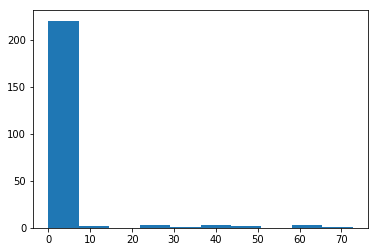

In [67]:
plt.hist(intensities)
plt.show()

7. What do you observe in this histogram ? Plot the third channel and see if the histogram makes sense.

The histogram can be split into two parts. Most nuclei have almost no signal (around 0). A few have much more signal between 10 and 80. The plot of the third channel shows that only a few nuclei are expressing a specific protein that is fluorescent.

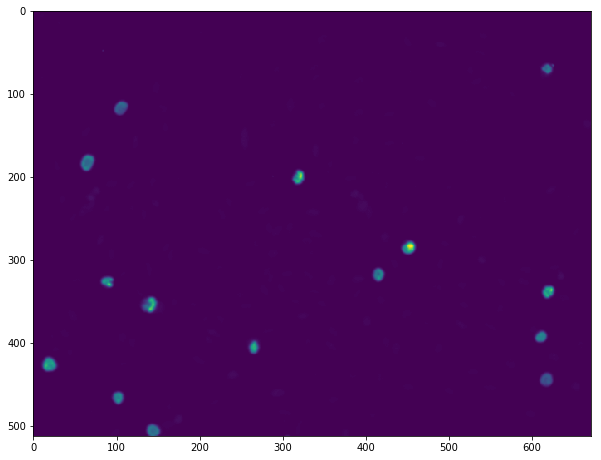

In [79]:
plt.subplots(figsize = (10,10))
plt.imshow(image_stack[:,:,2])
plt.show()

We can count how many nuclei are above some threshold:

In [80]:
np.array(intensities) > 10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [81]:
np.sum(np.array(intensities) > 10)

15